In [90]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.parser import parse

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [6]:
campanyes = pd.read_csv ("D:/Capstone-UOC/Data/dades-capstone-def3_2.csv", parse_dates=True, index_col=0)

,producte_comprat_recode,punt_entrada_recode,area_prod_comprat_recode,subarea_prod_comprat_recode,tipus_producte_comprat,canal_recode,idioma_recode,prod_recode,tipus_campanya_recode,data_ini_lead,...,data_propuesta,proposta_recomanada_tutor,matricula,data_matricula,estat_lead_recode,just_lead_recode,pais,regio,data_naixement,sexe
identif_usuari,,,,,,,,,,,,,,,,,,,,,
IDP820309,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,23/06/2015,...,12/07/2016,Sí,Sí,28/06/2015,Ganada,Matriculado,Arabia Saudí,NaN,12/11/1968,H
IDP867592,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,08/09/2015,...,NaN,NaN,No,NaN,Útil Negativa,No té temps suficient,España,Barcelona,21/06/1979,H
IDP589719,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,14/07/2015,...,15/07/2015,Sí,Sí,15/07/2015,Ganada,Matriculado,España,Barcelona,13/07/1969,H
IDP845968,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,17/08/2015,...,03/09/2015,Sí,Sí,09/09/2015,Ganada,Matriculado,España,Barcelona,09/07/1994,H
IDP543179,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,14/07/2015,...,19/07/2015,NaN,Anulación tipo B,NaN,Pendiente Asignar,NaN,España,Barcelona,09/05/1971,D
IDP865017,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,01/09/2015,...,20/07/2016,Sí,Sí,15/09/2015,Ganada,Matriculado,España,Barcelona,27/11/1990,D
IDP860499,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,21/07/2015,...,21/07/2015,Sí,Sí,23/07/2015,Ganada,Matriculado,España,Barcelona,24/10/1980,H
IDP486228,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,14/07/2015,...,21/02/2016,Sí,Sí,20/07/2015,Ganada,Matriculado,España,Barcelona,29/12/1978,D
IDP860473,GR01,pe16,a5,sa17,g,c4,i1,p1,g,21/07/2015,...,28/07/2015,Sí,No,NaN,Pendiente Asignar,NaN,España,Valencia,14/01/1976,D


In [36]:
#revisamos información del fichero
campanyes.info()
#validamos las columnas cargadas
campanyes.columns

<class 'pandas.core.frame.DataFrame'>
Index: 133240 entries, IDP820309 to IDP894487
Data columns (total 27 columns):
producte_comprat_recode        133240 non-null object
punt_entrada_recode            133234 non-null object
area_prod_comprat_recode       133240 non-null object
subarea_prod_comprat_recode    132722 non-null object
tipus_producte_comprat         133240 non-null object
canal_recode                   133240 non-null object
idioma_recode                  55489 non-null object
prod_recode                    55489 non-null object
tipus_campanya_recode          55383 non-null object
data_ini_lead                  133240 non-null object
identif_lead                   133240 non-null object
semestre                       133240 non-null int64
acces                          66368 non-null object
data_acces                     73820 non-null object
data_ultima_conex              42939 non-null object
proposta                       70626 non-null object
data_propuesta             

Index([u'producte_comprat_recode', u'punt_entrada_recode',
       u'area_prod_comprat_recode', u'subarea_prod_comprat_recode',
       u'tipus_producte_comprat', u'canal_recode', u'idioma_recode',
       u'prod_recode', u'tipus_campanya_recode', u'data_ini_lead',
       u'identif_lead', u'semestre', u'acces', u'data_acces',
       u'data_ultima_conex', u'proposta', u'data_propuesta',
       u'proposta_recomanada_tutor', u'matricula', u'data_matricula',
       u'estat_lead_recode', u'just_lead_recode', u'pais', u'regio',
       u'data_naixement', u'sexe', u'edad'],
      dtype='object')

In [98]:
# cálculo de la edad en años
campanyes['data_naixement']=pd.to_datetime(campanyes['data_naixement'])
campanyes['edad_dias']=(pd.to_datetime(datetime.now())-pd.to_datetime(campanyes['data_naixement']))
campanyes['edad_anyos']=campanyes['edad_dias'].astype('timedelta64[D]')/365.24

edad_media_anyos=campanyes['edad_anyos'].mean()
edad_media_anyos

campanyes['edad_anyos'].hist(bins=90) 

In [99]:
edad_media_anyos

35.20947458269906

In [87]:
# recuento de usuarios por semestre
campanyes.groupby(['semestre'])['sexe'].count()

semestre
20151    45457
20152    31924
20161    54727
Name: sexe, dtype: int64

In [12]:
# recuento de usuarios por semestre
campanyes.groupby(['semestre','estat_lead_recode'])['producte_comprat_recode'].count()

semestre  estat_lead_recode  
20151     Ganada                 11601
          No interesado              2
          No útil                 3123
          Pendiente Asignar      11866
          Pendiente Contactar        1
          Útil Negativa           6734
          Útil Positiva          12130
20152     Ganada                  5805
          No útil                 2437
          Pendiente Asignar       3880
          Pendiente Contactar      436
          Útil Negativa          12953
          Útil Positiva           6413
20161     Ganada                 13684
          No útil                 7266
          Pendiente Asignar       2848
          Pendiente Contactar      814
          Útil Negativa          19035
          Útil Positiva          11080
Name: sexe, dtype: int64

In [58]:
# agrupamos por identif_usuari y calculamos count_distinct para diferentes campos
campanyes.groupby(['semestre'])['identif_usuari'].unique()

KeyError: 'Column not found: identif_usuari'

In [55]:
# filtramos campaña 20151, 20152 y 20161
campanya_20151 = campanyes[campanyes['semestre'] == 20151]
campanya_20152 = campanyes[campanyes['semestre'] == 20152]
campanya_20161 = campanyes[campanyes['semestre'] == 20161]
campanya_20151
campanya_20152
campanya_20161

,producte_comprat_recode,punt_entrada_recode,area_prod_comprat_recode,subarea_prod_comprat_recode,tipus_producte_comprat,canal_recode,idioma_recode,prod_recode,tipus_campanya_recode,data_ini_lead,...,proposta_recomanada_tutor,matricula,data_matricula,estat_lead_recode,just_lead_recode,pais,regio,data_naixement,sexe,edad
identif_usuari,,,,,,,,,,,,,,,,,,,,,
IDP457645,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,01/05/2016,...,Sí,Sí,11/07/2016,Ganada,Matriculado,España,Barcelona,09/02/1979,H,1979-09-02
IDP419006,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,29/05/2016,...,Sí,Sí,10/06/2016,Ganada,Matriculado,España,Las Palmas,07/03/1967,H,1967-07-03
IDP738880,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,13/06/2016,...,No,Sí,17/06/2016,Ganada,Matriculado,España,Barcelona,04/06/1992,D,1992-04-06
IDP734264,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,11/07/2016,...,Sí,Sí,13/07/2016,Ganada,Matriculado,España,Barcelona,10/04/1987,D,1987-10-04
IDP849842,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,12/07/2016,...,No,Sí,12/07/2016,Ganada,Matriculado,España,Lérida,13/02/1996,H,1996-02-13
IDP212806,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,16/06/2016,...,Sí,Sí,10/07/2016,Ganada,Matriculado,España,Barcelona,05/08/1977,H,1977-05-08
IDP267176,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,14/06/2016,...,Sí,Sí,12/07/2016,Ganada,Matriculado,España,Barcelona,30/04/1974,H,1974-04-30
IDPS840739,GR01,pe17,a5,sa17,g,c0,NaN,NaN,NaN,13/04/2016,...,NaN,NaN,NaN,Útil Negativa,Il·localitzable,España,Barcelona,30/05/1978,D,1978-05-30
IDP283044,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,13/05/2016,...,NaN,No,NaN,Pendiente Asignar,NaN,España,Madrid,08/11/1977,D,1977-08-11


In [56]:
campanya_20151['data_ini_lead_date']=pd.to_datetime(campanya_20151['data_ini_lead'])
campanya_20152['data_ini_lead_date']=pd.to_datetime(campanya_20152['data_ini_lead'])
campanya_20161['data_ini_lead_date']=pd.to_datetime(campanya_20161['data_ini_lead'])

C:\Users\erodriguezgar\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\erodriguezgar\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\erodriguezgar\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [54]:
#graficamos la evolución de leads campanya 20151, 20152 y 20161 por fecha
evol_campanya_20151=campanya_20151.groupby(['data_ini_lead_date'])['producte_comprat_recode'].count()
evol_campanya_20152=campanya_20152.groupby(['data_ini_lead_date'])['producte_comprat_recode'].count()
evol_campanya_20161=campanya_20161.groupby(['data_ini_lead_date'])['producte_comprat_recode'].count()

evol_campanya_20151.plot()
evol_campanya_20152.plot()
evol_campanya_20161.plot()

In [18]:
import numpy as np

In [21]:
matricula.describe()

C:\Users\rzafrai\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,data_ini_lead,semestre,data_acces,data_ultima_conex,data_propuesta,data_matricula,data_naixement,data_fi_campanya
count,133240.000000,133240.000000,73820.000000,42939.000000,38689.000000,33881.000000,133230.000000,133240.000000
mean,42390.019078,20155.390168,42396.935519,42843.196395,42490.685673,42424.865234,30038.678571,42452.743576
std,168.973312,4.738586,1360.880833,86.532953,150.910973,170.289731,3518.297174,164.294988
min,39028.000000,20151.000000,39028.000000,39349.000000,39975.000000,39978.000000,1.000000,42256.000000
25%,42241.000000,20151.000000,NaN,NaN,NaN,NaN,NaN,42256.000000
50%,42395.000000,20152.000000,NaN,NaN,NaN,NaN,NaN,42423.000000
75%,42548.000000,20161.000000,NaN,NaN,NaN,NaN,NaN,42633.000000
max,42863.000000,20161.000000,407645.000000,42870.000000,42807.000000,42802.000000,38701.000000,42633.000000


In [22]:
matricula["sexe"]

0         H
1         H
2         H
3         H
4         D
5         D
6         H
7         D
8         D
9         H
10        H
11        D
12        D
13        D
14        H
15        D
16        D
17        H
18        D
19        H
20        H
21        H
22        D
23        H
24        D
25        H
26        H
27        H
28        D
29        H
         ..
133210    D
133211    D
133212    D
133213    H
133214    H
133215    D
133216    D
133217    D
133218    D
133219    D
133220    D
133221    H
133222    H
133223    D
133224    H
133225    D
133226    H
133227    D
133228    H
133229    D
133230    D
133231    H
133232    D
133233    D
133234    D
133235    D
133236    H
133237    D
133238    D
133239    D
Name: sexe, dtype: object

matricula["sexe"]

In [27]:
matricula["data_matricula"]>42424

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
133210    False
133211    False
133212    False
133213    False
133214    False
133215     True
133216    False
133217     True
133218    False
133219    False
133220     True
133221    False
133222    False
133223    False
133224    False
133225    False
133226    False
133227    False
133228    False
133229    False
133230    False
133231    False
133232    False
133233    False
133234    False
133235    False
133236     True
133237     True
133238     True
133239     True
Name: data_matricula, dt

In [29]:
matricula[matricula["data_matricula"]>42424]

,identif_usuari,producte_comprat_recode,punt_entrada_recode,area_prod_comprat_recode,subarea_prod_comprat_recode,tipus_producte_comprat,canal_recode,idioma_recode,prod_recode,tipus_campanya_recode,...,proposta_recomanada_tutor,matricula,data_matricula,estat_lead_recode,just_lead_recode,pais,regio,data_naixement,sexe,data_fi_campanya
53,IDP498033,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,...,S�,S�,42780.0,Ganada,Matriculado,Espa�a,Barcelona,26010.0,D,42256
147,IDP505090,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,...,S�,S�,42775.0,Ganada,Matriculado,Espa�a,Barcelona,26469.0,D,42256
209,IDP507981,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,...,S�,S�,42566.0,Ganada,Matriculado,Espa�a,Barcelona,27635.0,D,42256
569,IDP479514,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,...,No,S�,42635.0,Ganada,Matriculado,Espa�a,Barcelona,30214.0,D,42256
2225,IDP367200,GR01,pe16,a5,sa17,g,c0,NaN,NaN,NaN,...,NaN,S�,42790.0,Ganada,Matriculado,Espa�a,Barcelona,26091.0,D,42256
2497,IDP408975,GR02,pe16,a8,sa34,g,c0,NaN,NaN,NaN,...,S�,Anulaci�n tipo B,42787.0,No �til,Anulaci�n de Matr�cula,Espa�a,Barcelona,22677.0,D,42256
2503,IDP532382,GR02,pe16,a8,sa34,g,c0,NaN,NaN,NaN,...,S�,S�,42535.0,Ganada,Matriculado,Espa�a,Gerona,30333.0,D,42256
2723,IDP503818,GR02,pe16,a8,sa34,g,c0,NaN,NaN,NaN,...,No,S�,42795.0,Ganada,Matriculado,Espa�a,Castell�n,30748.0,D,42256
2748,IDP453833,GR02,pe16,a8,sa34,g,c0,NaN,NaN,NaN,...,NaN,S�,42795.0,Ganada,Matriculado,Espa�a,Barcelona,26514.0,D,42256
4499,IDP398598,GR02,pe16,a8,sa34,g,c0,NaN,NaN,NaN,...,S�,S�,42576.0,Ganada,Matriculado,Portugal,NaN,27231.0,D,42256


In [32]:
group=matricula[["producte_comprat_recode","data_matricula"-"data_naixement"]].groupby('producte_comprat_recode').mean()
group.sort_values(by='data_matricula'-"data_naixement", ascending= False)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [2]:
matricula["dias_matricula"] = matricula['data_matricula']-matricula['data_ini_lead']
matricula.tail()

NameError: name 'matricula' is not defined

In [42]:
matricula["dias_inici_fi_campanya"] = matricula['data_fi_campanya']-matricula['data_ini_lead']
matricula.tail()

,identif_usuari,producte_comprat_recode,punt_entrada_recode,area_prod_comprat_recode,subarea_prod_comprat_recode,tipus_producte_comprat,canal_recode,idioma_recode,prod_recode,tipus_campanya_recode,...,data_matricula,estat_lead_recode,just_lead_recode,pais,regio,data_naixement,sexe,data_fi_campanya,dias_matricula,dias_inici_fi_campanya
133235,IDPS888158,MU01,pe8,a3,sa6,m,c3,i2,p2,g,...,NaN,Pendiente Asignar,NaN,Espa�a,Tarragona,25440.0,D,42633,NaN,-13
133236,IDP906321,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,42660.0,Ganada,Matriculado,Espa�a,Baleares,33883.0,H,42633,61.0,34
133237,IDP890747,MU01,pe16,a3,sa6,m,c2,i1,p3,e,...,42542.0,Ganada,Matriculado,Espa�a,L�rida,34654.0,D,42633,52.0,143
133238,IDP640557,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,42599.0,Ganada,Matriculado,Espa�a,Valencia,30617.0,D,42633,0.0,34
133239,IDP894487,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,42549.0,Ganada,Matriculado,Espa�a,Barcelona,24000.0,D,42633,21.0,105


In [43]:
matricula["dias_acces"] = matricula['data_acces']-matricula['data_ini_lead']
matricula.tail()

,identif_usuari,producte_comprat_recode,punt_entrada_recode,area_prod_comprat_recode,subarea_prod_comprat_recode,tipus_producte_comprat,canal_recode,idioma_recode,prod_recode,tipus_campanya_recode,...,estat_lead_recode,just_lead_recode,pais,regio,data_naixement,sexe,data_fi_campanya,dias_matricula,dias_inici_fi_campanya,dias_acces
133235,IDPS888158,MU01,pe8,a3,sa6,m,c3,i2,p2,g,...,Pendiente Asignar,NaN,Espa�a,Tarragona,25440.0,D,42633,NaN,-13,NaN
133236,IDP906321,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,Ganada,Matriculado,Espa�a,Baleares,33883.0,H,42633,61.0,34,0.0
133237,IDP890747,MU01,pe16,a3,sa6,m,c2,i1,p3,e,...,Ganada,Matriculado,Espa�a,L�rida,34654.0,D,42633,52.0,143,0.0
133238,IDP640557,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,Ganada,Matriculado,Espa�a,Valencia,30617.0,D,42633,0.0,34,0.0
133239,IDP894487,MU01,pe16,a3,sa6,m,c0,NaN,NaN,NaN,...,Ganada,Matriculado,Espa�a,Barcelona,24000.0,D,42633,21.0,105,0.0


In [1]:
filtered_data = matricula[matricula["dias_matricula"]>0]  
pivmatricula=pd.pivot_table(filtered_data, values='dias_matricula', index=['producte_comprat_recode'],columns = ['regio'])
pivmatricula

NameError: name 'matricula' is not defined

In [52]:
pivmatricula.rank(ascending=True,method='first')

sexe,D,H,n/d
producte_comprat_recode,,,
GR01,73.0,55.0,NaN
GR02,59.0,45.0,5.0
GR03,70.0,66.0,NaN
GR04,50.0,49.0,NaN
GR05,90.0,79.0,8.0
GR06,68.0,36.0,NaN
GR07,57.0,31.0,NaN
GR08,54.0,73.0,NaN
GR09,78.0,74.0,NaN


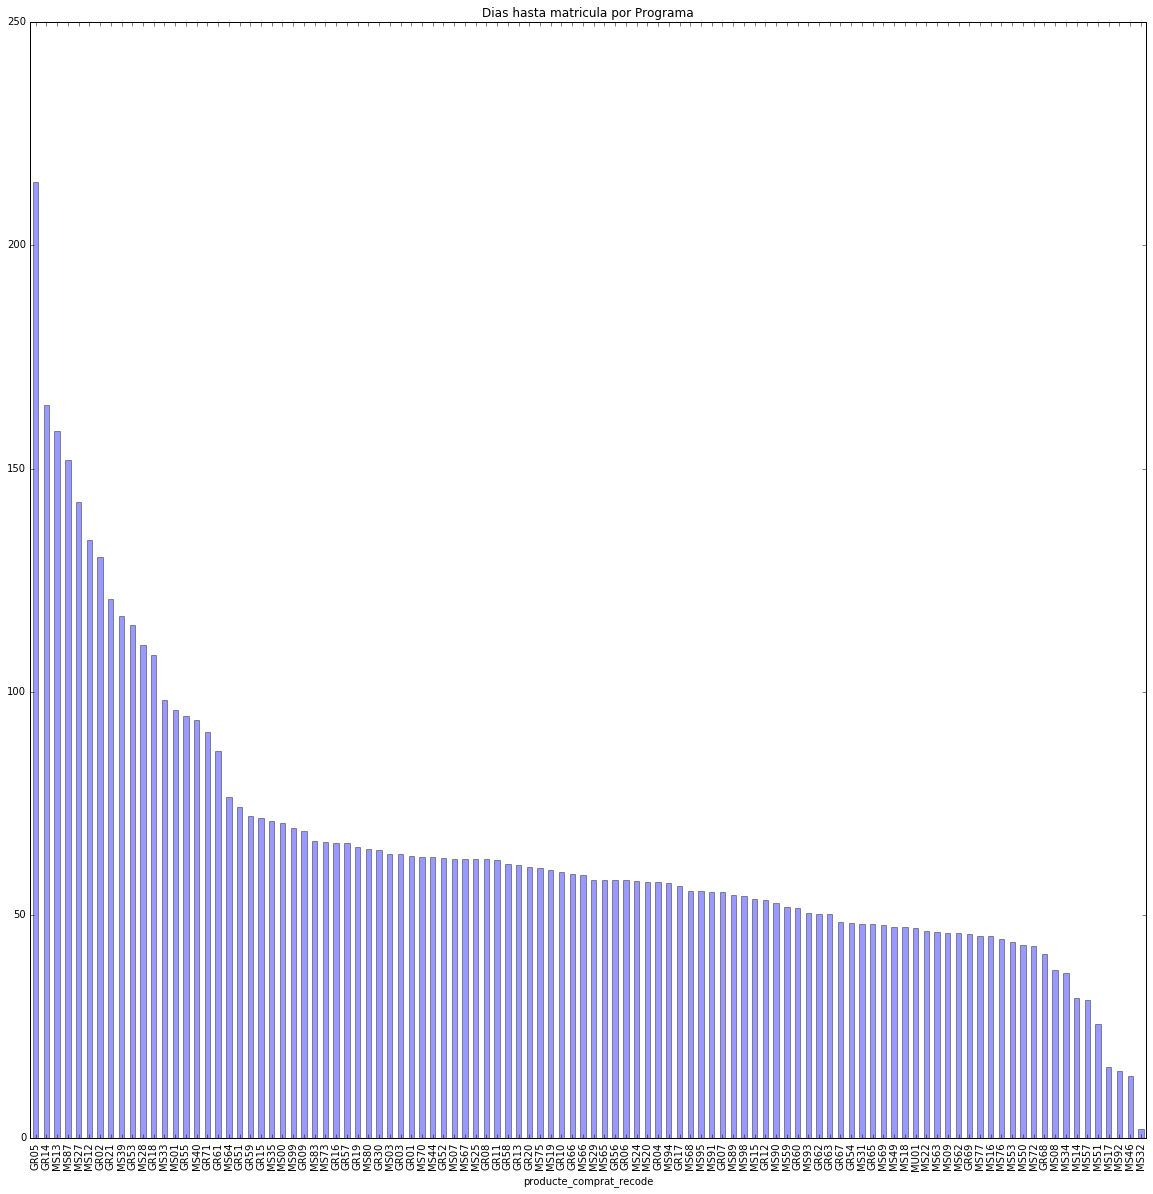

In [61]:
%matplotlib inline 
import matplotlib.pylab as plt

fig = plt.figure(figsize=(20,20))
totalSum=pivmatricula.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='a', alpha=0.4,title = "Dias hasta matricula por Programa")
#plt.savefig("Totalvalue_Country.png",dpi= 300, bbox_inches='tight')
plt.show()